Position From Sun (AU):  [ 0.14378188 -1.31847293  0.26087179]
Velocity (AU/Day):  [1.50824062e-02 4.18873513e-03 4.29888725e-05]
Position From Earth (AU):  [-0.19588349 -0.3603189   0.26081852]

Semimajor Axis Calculated:  1.5347335842168266
Semimajor Axis JPL:  1.535501123505049
Semimajor Axis % Error:  0.04998624074402778

Eccentricity Calculated:  0.19705335525560747
Eccentricity JPL:  0.1980131722243141
Eccentricity % Error:  0.4847237978791335

Inclination Calculated:  11.297804644956452
Inclination JPL:  11.27908127242095
Inclination % Error:  0.1660008655251377

Longitude of Ascending Nodes Calculated:  196.30886625388013
Longitude of Ascending Nodes JPL:  196.197631075624
Longitude of Ascending Nodes % Error:  0.05669547468350829

Argument of Perihelion Calculated:  142.49765048841454
Argument of Perihelion JPL:  142.5325538303718
Argument of Perihelion % Error:  0.0244879790751516

Mean Anomaly Calculated:  316.2320820844707
Mean Anomaly JPL:  316.3937598615976
Mean Anomaly %

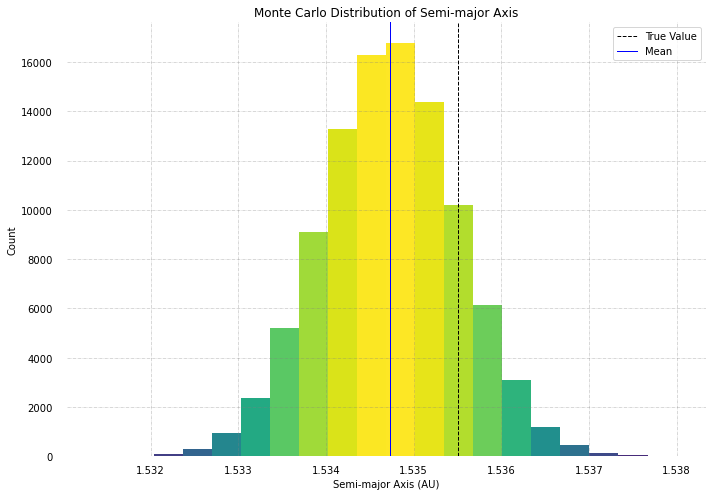

Semi-major Axis  Mean:  1.5347336285824555
Semi-major Axis  SDOM:  0.0007731281226644097
Semi-major Axis  % error w/JPL :  0.04998335141830413


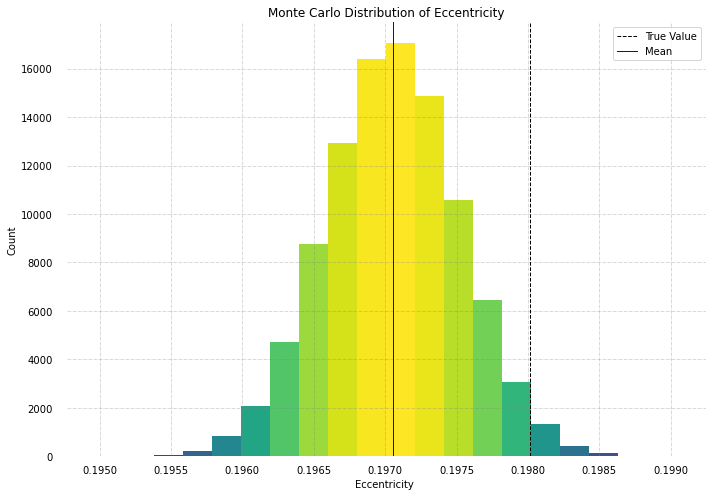

Eccentricity  Mean:  0.1970531222823504
Eccentricity  SDOM:  0.0004663794170605351
Eccentricity  % error w/JPL :  0.48484145331309175


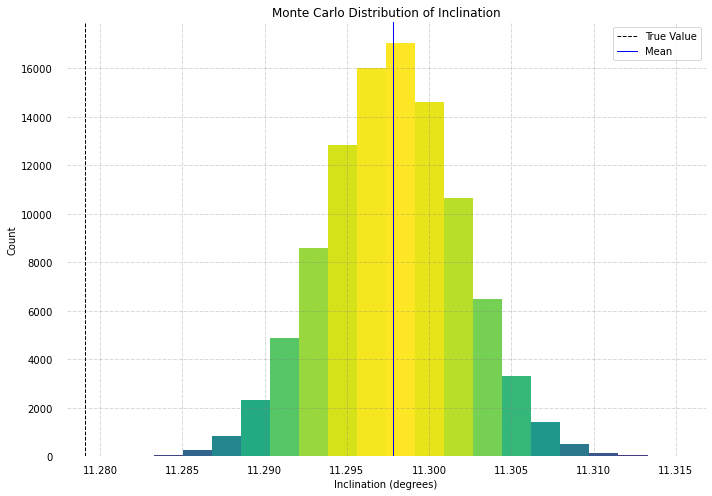

Inclination  Mean:  11.297809351667235
Inclination  SDOM:  0.004132825797427913
Inclination  % error w/JPL :  0.16604259508332794


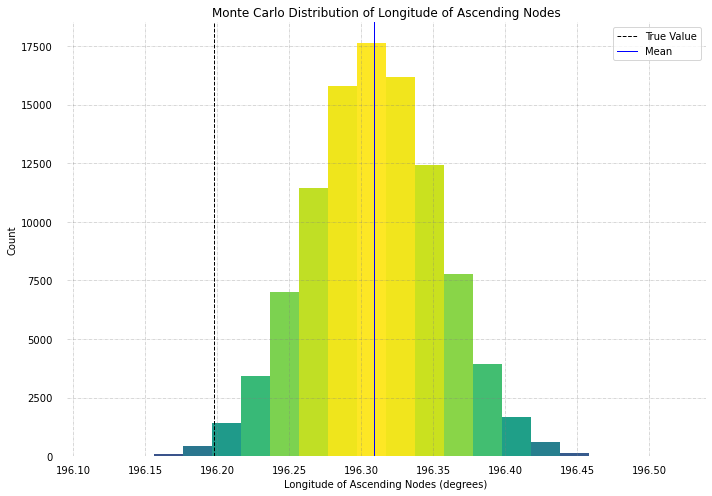

Longitude of Ascending Nodes  Mean:  196.30889854332906
Longitude of Ascending Nodes  SDOM:  0.04513228422902848
Longitude of Ascending Nodes  % error w/JPL :  0.05671193229757917


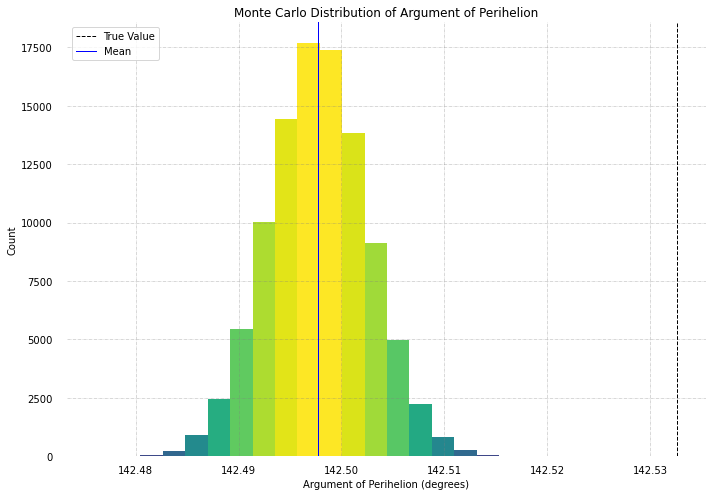

Argument of Perihelion  Mean:  142.49775245532916
Argument of Perihelion  SDOM:  0.004814987106110056
Argument of Perihelion  % error w/JPL :  0.02441643968861347


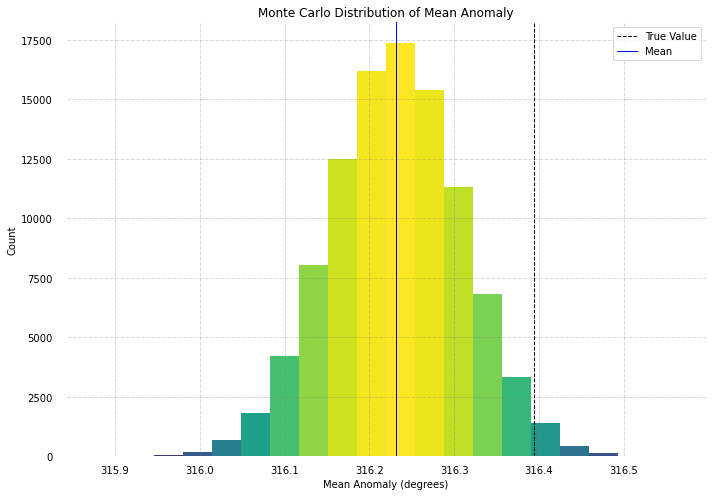

Mean Anomaly  Mean:  316.23191874254076
Mean Anomaly  SDOM:  0.07761565117156517
Mean Anomaly  % error w/JPL :  0.051151804993755906


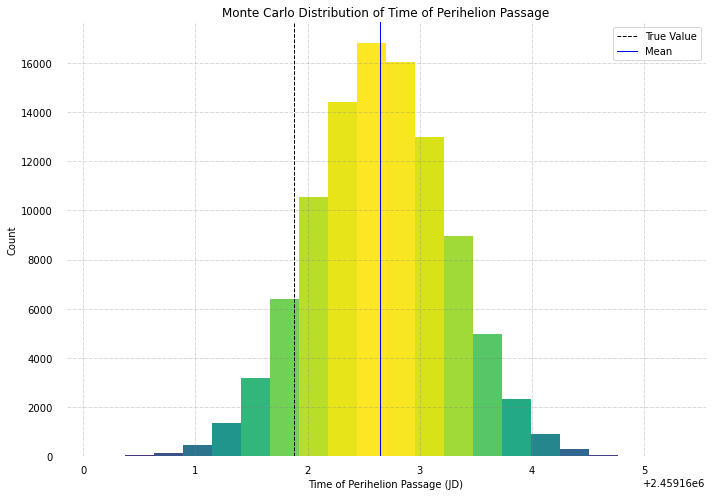

Time of Perihelion Passage  Mean:  2459162.6481523933
Time of Perihelion Passage  SDOM:  0.6075268168593946
Time of Perihelion Passage  % error w/JPL :  3.132756951753976e-05


In [2]:
import ODLIB as od

#if running to test ChenOD package, please replace with proper file paths for input and corrs files
obsTimes, ras, decs, Rs = od.parseODTxt("/home/chentyl/Desktop/Python SSP Code/OD CODE/chenInput.txt")
futureTimes, futureRs = od.parseSunTxt("/home/chentyl/Desktop/Python SSP Code/OD CODE/sunsInput.txt")
data, rho2 = od.MOG(obsTimes, ras, decs, Rs)
h, a, e, i, om, w, m, T = od.orbitalElements(data, obsTimes[1])
JPLVals = [1.535501123505049E+00, 1.980131722243141E-01, 1.127908127242095E+01, 1.961976310756240E+02, 1.425325538303718E+02, 3.163937598615976E+02, 2459856.859881772194]

print("Position From Sun (AU): ", data[0])
print("Velocity (AU/Day): ", data[1])
print("Position From Earth (AU): ", rho2)
print()
od.compareElements(data, obsTimes[1], JPLVals)

#mean anomaly on july 24th
tiempo = 2459784.7916667
fM = od.futureMean(a, T, tiempo)
print()
print("Mean Anomaly on July 24th: ", fM)
print()

od.ephemerides(data, futureRs, futureTimes, obsTimes[1])

#please replace proper file paths for corr.fits files
path1 = '/home/chentyl/Desktop/Observation Images/6-27-2022/Astrometry/corr02.fits'
path2 = '/home/chentyl/Desktop/Observation Images/07-12-2022/Astrometry/corr8.fits'
path3 = '/home/chentyl/Desktop/Observation Images/07-14-2022/Astrometry/corr11.fits'
od.monteCarlo(path1, path2, path3, obsTimes, ras, decs, Rs, JPLVals, True, 100000)

In [2]:
import numpy as np
from astropy import units as u
from astropy.time import Time
from poliastro.bodies import Earth, Mars, Sun
from poliastro.constants import J2000
from poliastro.plotting import OrbitPlotter3D
from poliastro.twobody import Orbit
from poliastro.ephem import Ephem
from poliastro.ephem import Planes
from poliastro.util import time_range
import plotly.io as pio

#if running please make sure that proper poliastro and astropy packages are installed
pio.renderers.default = "plotly_mimetype+notebook_connected"
V = od.trueAnomaly(data)
print()
epoch = Time("2022-07-08 04:20:38", scale = "tcb")
asteroid = Orbit.from_classical(Sun, a << u.AU, e << u.one, i << u.deg, om << u.deg, w << u.deg, V << u.deg)

frame = OrbitPlotter3D(plane=Planes.EARTH_ECLIPTIC)
frame.plot_body_orbit(Earth, epoch)
frame.plot_body_orbit(Mars, epoch)
frame.plot(asteroid)

/home/chentyl/.local/lib/python3.6/site-packages/astropy/units/decorators.py:234: UserWarning:

Wrapping true anomaly to -π <= nu < π

